<a href="https://colab.research.google.com/github/lokeshparab/Exploratory-Data-Analysis/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lokesh Parab Task 3**
#**Exploratory Data Analysis**
#**Q) Find out the weaks ares where you can work to make more profit**

In [1]:
# Importing the libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/SampleSuperstore.csv")
print("Data imported successfully")

df.head(10)

Data imported successfully


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
df.shape

(9994, 13)

In [4]:
df['Country'].unique()

array(['United States'], dtype=object)

In [5]:
del df['Country']

In [6]:
df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [7]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [8]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [9]:
df['Discount'].unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

In [10]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

##**Average Profit and Average Sales By Discount**

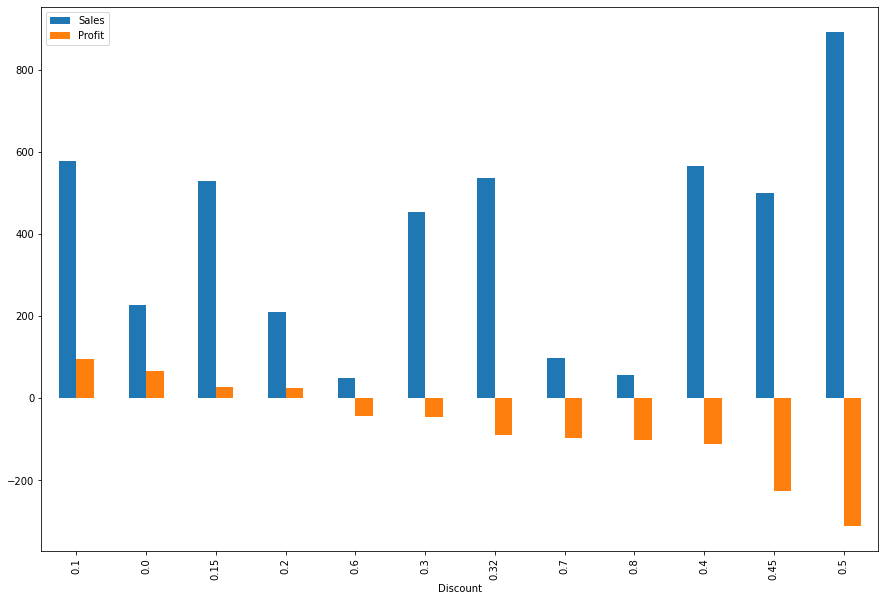

In [ ]:
df.groupby('Discount').mean()[['Sales','Profit']].sort_values(by='Profit',ascending = False).plot.bar(figsize = (15,10))

## **Check the profit for 0.5 i.e 50 % discount**

In [ ]:
d1 = df[df['Discount']==0.5][df['Profit']>0]

In [ ]:
d1

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


In [ ]:
d1.shape

(0, 12)

###**Finding all Discount which have all profit less that zero**

In [ ]:
dist=[]
for dis in df['Discount'].unique():
  d = df[df['Discount']==dis][df['Profit']>0]
  if d.shape == (0,12): dist.append(dis)

In [ ]:
dist

[0.45, 0.8, 0.5, 0.7, 0.6, 0.32]

###**Sub Category of that unique discount which has loss**

In [ ]:
data = { 'Discount':dist , 'Sub-Category':[]}

for dis in dist:
  d = df[ df['Discount']==dis ]['Sub-Category'].unique()
  data['Sub-Category'].append( str(d) )

In [ ]:
pd.DataFrame(data)

,Discount,Sub-Category
0,0.45,['Tables']
1,0.80,['Appliances' 'Binders']
2,0.50,['Bookcases' 'Tables' 'Machines']
3,0.70,['Binders' 'Machines' 'Bookcases']
4,0.60,['Furnishings']
5,0.32,['Bookcases']


###**Remaining Discount**

In [13]:
# For 30 % discount
d1 = df[df['Discount']==0.3][df['Profit']>0]
d3 = df[df['Discount']==0.3][df['Profit']<0]

# For 40 % discount
d2 = df[df['Discount']==0.4][df['Profit']>0]
d4 = df[df['Discount']==0.4][df['Profit']<0]

####**30% discount**

In [14]:
#Profit
d1['Sub-Category'].unique()

array(['Machines', 'Tables'], dtype=object)

In [ ]:
#Loss
d3['Sub-Category'].unique()

array(['Chairs', 'Tables', 'Bookcases', 'Machines'], dtype=object)

####**40% discount**

In [15]:
#Profit
d2['Sub-Category'].unique()

array(['Phones', 'Machines', 'Copiers'], dtype=object)

In [ ]:
#Loss
d4['Sub-Category'].unique()

array(['Phones', 'Machines', 'Tables'], dtype=object)

###**Discount that getting Profit**

In [19]:
p_dist=[0.1,0.0,0.15,0.2]
data = {}
for dis in p_dist:
  d = df[ df['Discount']==dis ]['Sub-Category'].unique()
  data[dis]= d


In [23]:
for k,v in data.items():
  print(k,":",*v)

0.1 : Chairs Appliances Machines
0.0 : Bookcases Chairs Labels Furnishings Art Appliances Storage Tables Accessories Binders Phones Fasteners Paper Envelopes Supplies Machines Copiers
0.15 : Bookcases
0.2 : Storage Phones Binders Tables Paper Furnishings Envelopes Art Chairs Accessories Fasteners Appliances Labels Supplies Bookcases Copiers Machines


##**Average Profit and Average Sales By Segment**

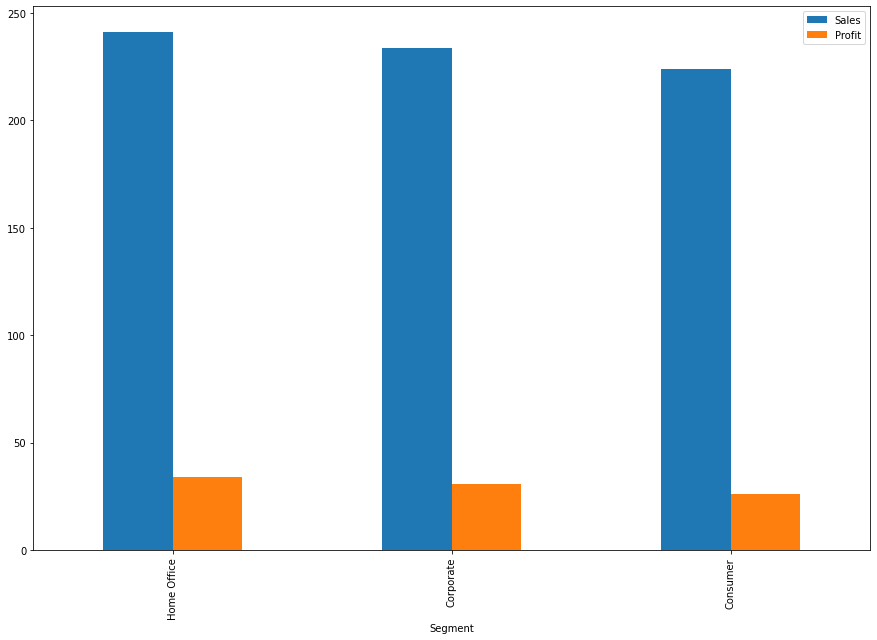

In [ ]:
df.groupby('Segment').mean()[['Sales','Profit']].sort_values(by='Profit',ascending = False).plot.bar(figsize = (15,10))

##**Average Profit and Average Sales By ShipMode**

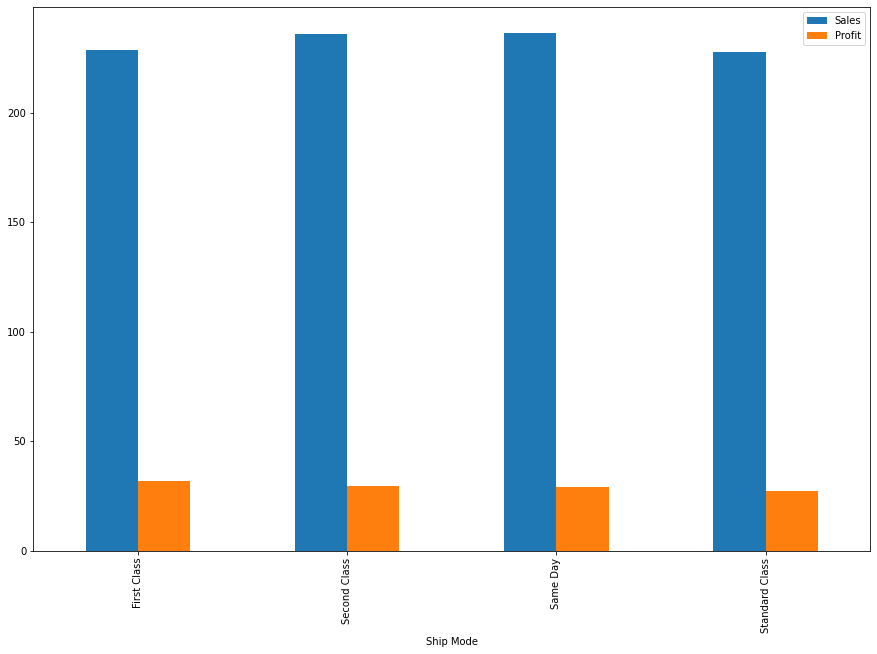

In [27]:
df.groupby('Ship Mode').mean()[['Sales','Profit']].sort_values(by='Profit',ascending = False).plot.bar(figsize = (15,10))

##**Average Profit and Average Sales By State**

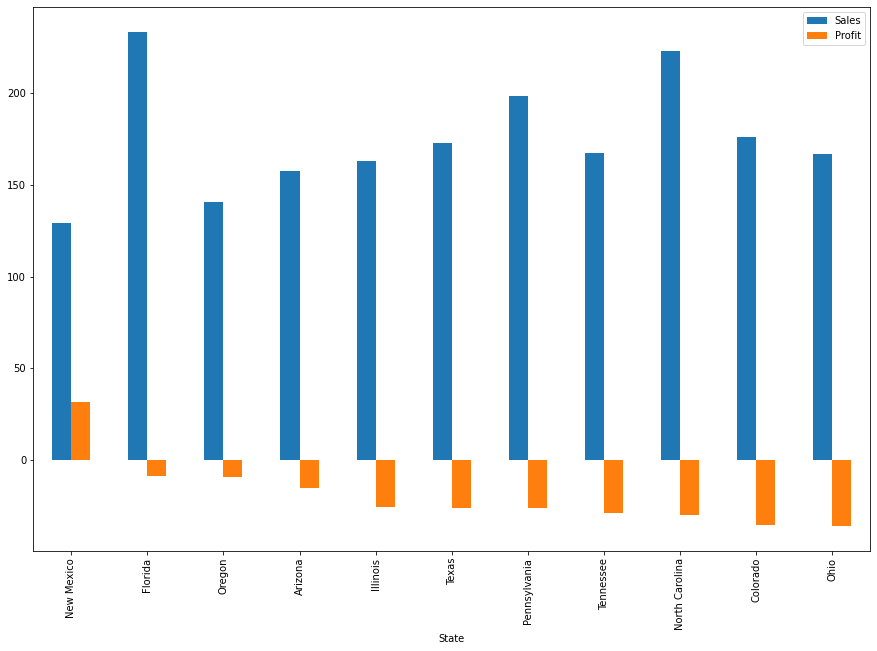

In [ ]:
df.groupby('State').mean()[['Sales','Profit']].sort_values(by='Profit',ascending = False).tail(11).plot.bar(figsize = (15,10))

###**Checking Maximum loss in Sub-category of State**

In [ ]:
state = ['Florida','Oregon','Arizona','Illinois','Texas','Pennsylvania','Tennessee','North Carolina','Colorado','Ohio']
lst=[]
for s in state:
  d = df[df['State']==s].groupby('Sub-Category').mean()['Profit']
  loss =  min(d)
  for k in d.keys():
    if d[k]==loss:
      lst.append([s,k,loss])


In [ ]:
pd.DataFrame(lst,columns=['State','Sub-Category','Profit'])

,State,Sub-Category,Profit
0,Florida,Machines,-329.335167
1,Oregon,Tables,-209.779420
2,Arizona,Machines,-310.313667
3,Illinois,Tables,-239.430261
4,Texas,Machines,-205.141800
5,Pennsylvania,Machines,-317.035086
6,Tennessee,Tables,-332.926725
7,North Carolina,Machines,-1346.202150
8,Colorado,Machines,-1461.418467
9,Ohio,Machines,-1471.368087


###**Checking reason for Ohio**

In [ ]:
d1 = df[df['State']== 'Ohio']

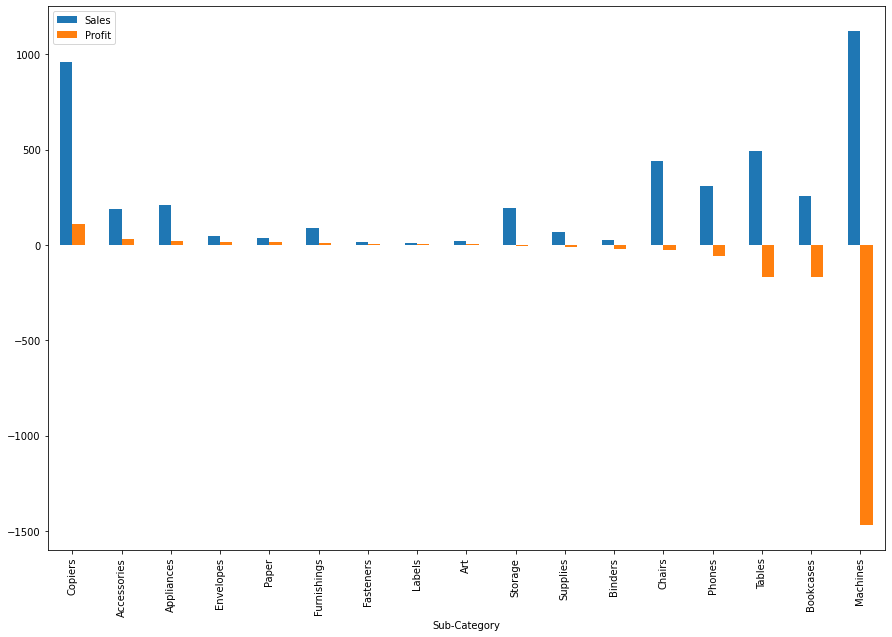

In [ ]:
d1.groupby('Sub-Category').mean()[['Sales','Profit']].sort_values(by='Profit',ascending = False).plot.bar(figsize = (15,10))

###**Average Profit and Sale of Machines Group by State**

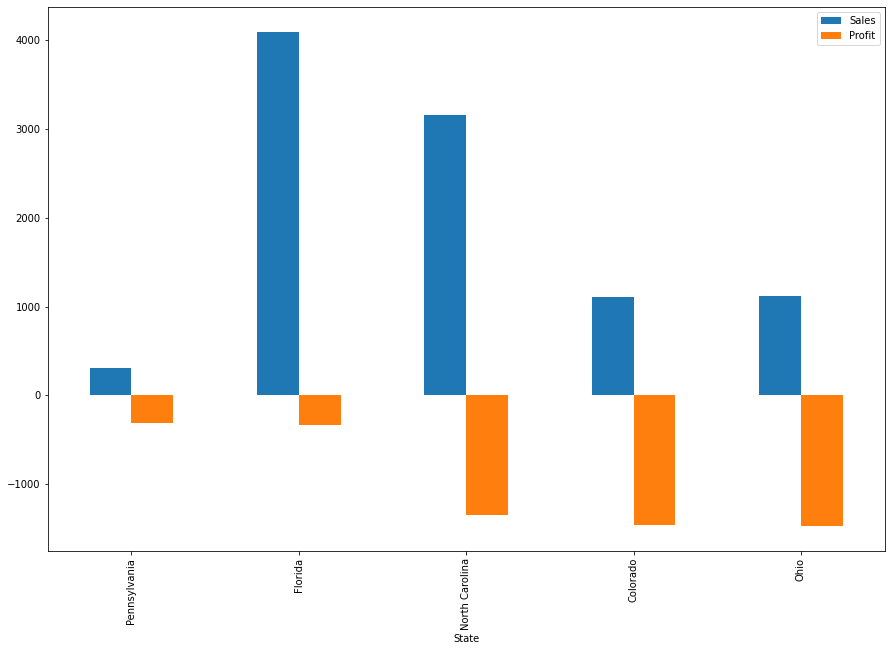

In [ ]:
df[df['Sub-Category']=='Machines'].groupby('State').mean()[['Sales','Profit']].sort_values(by='Profit',ascending = False).tail().plot.bar(figsize = (15,10))

###**Average Profit and Sale of Tables Group by State**

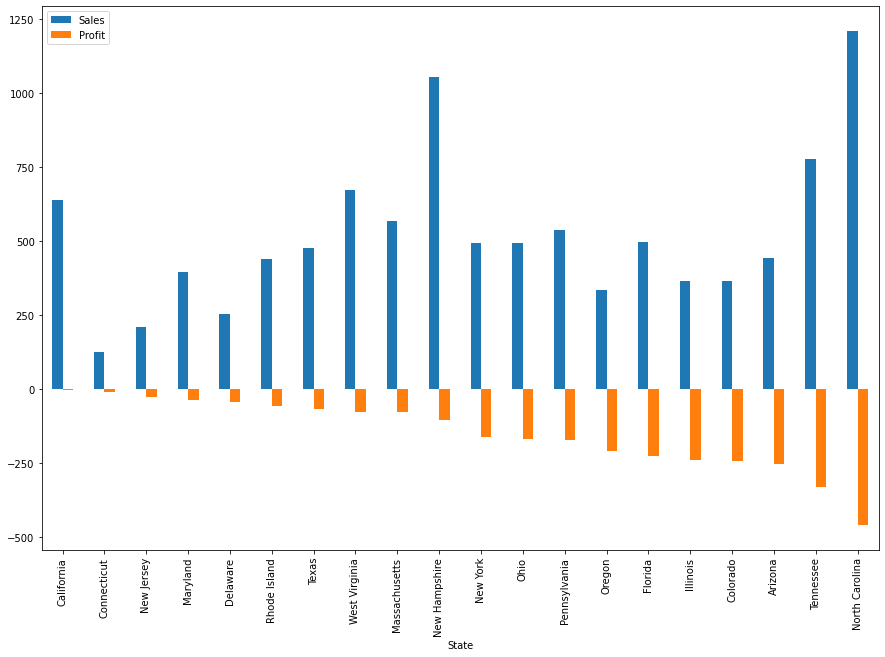

In [ ]:
df[df['Sub-Category']=='Tables'].groupby('State').mean()[['Sales','Profit']].sort_values(by='Profit',ascending = False).tail(20).plot.bar(figsize = (15,10))

##**Average Profit and Average Sales By City**

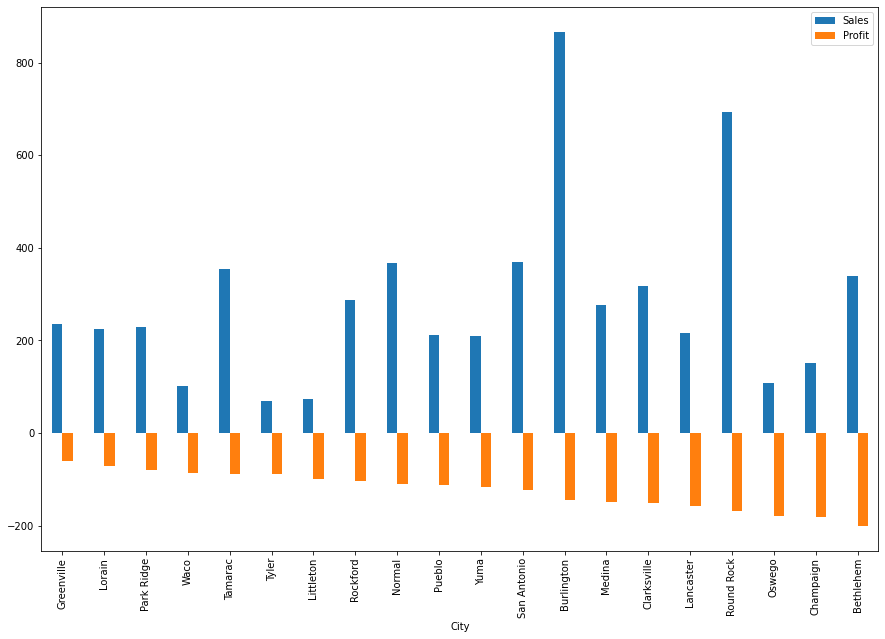

In [46]:
df.groupby('City').mean()[['Sales','Profit']].sort_values(by='Profit',ascending = False).tail(20).plot.bar(figsize = (15,10))

###**List and Count of Cities achieving Loss**

In [113]:
 d1 = df.groupby('City').mean()[['Sales','Profit']].sort_values(by='Profit',ascending = False)
 d1 = d1[ d1['Profit']<0 ]

In [118]:
print("There are",len(d1),'cities achieving loss') 

There are 116 cities achieving loss


In [120]:
cities = d1[ d1['Profit']<0 ].index
for city in cities:
  print(city)

Austin
Hickory
Altoona
Bolingbrook
Elyria
Mason
Pensacola
Ormond Beach
Freeport
Tucson
Hamilton
Wilson
Gastonia
Abilene
Cuyahoga Falls
Laredo
San Marcos
Pembroke Pines
League City
Corpus Christi
Peoria
Denver
Sanford
Grand Prairie
Scottsdale
Boca Raton
Carol Stream
Garland
Charlotte
Lakeland
Mcallen
Akron
Tinley Park
Tampa
Hendersonville
Frisco
Greensboro
El Paso
Missouri City
Hialeah
Allen
Deer Park
Toledo
Fort Lauderdale
Richardson
Irving
Frankfort
Daytona Beach
Odessa
Redmond
San Angelo
Romeoville
Wheeling
Bloomington
Mesquite
Dallas
Naperville
Jacksonville
Troy
Marion
Mesa
Miami
Cleveland
York
Parker
Mentor
Chicago
Concord
Highland Park
Dublin
Louisville
Plano
Philadelphia
Houston
Tigard
Nashville
Carrollton
Skokie
Allentown
Commerce City
Mansfield
Bryan
Fort Collins
Colorado Springs
Amarillo
College Station
Des Plaines
Aurora
Phoenix
Buffalo Grove
Ontario
Knoxville
Memphis
Elmhurst
Reading
Pharr
Greenville
Lorain
Park Ridge
Waco
Tamarac
Tyler
Littleton
Rockford
Normal
Pueblo
Yuma


###**Checking reason for Oswesgo**

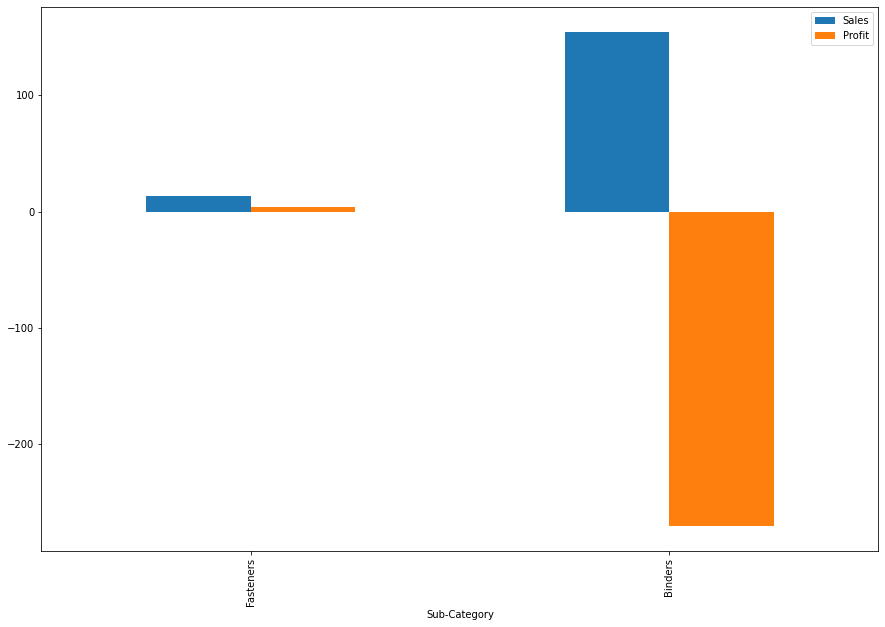

In [ ]:
df[df['City']=='Oswego'].groupby('Sub-Category').mean()[['Sales','Profit']].sort_values(by='Profit',ascending = False).plot.bar(figsize = (15,10))

###**Checking Maximum loss in Sub-category of cities**

In [57]:
# List of all cities which achieve loss 
d1 = df.groupby('City').mean()[['Sales','Profit']].sort_values(by='Profit',ascending = False)
d1 = d1[ d1['Profit']<0 ].index

In [58]:
lst=[]

for c in d1:

  # Taking average profit by Sub-Category of one city
  d = df[df['City']==c].groupby('Sub-Category').mean()['Profit'] 

  # Taking maximum loss value
  loss =  min(d)

  # finding the Sub category for that loss value
  for k in d.keys():
    if d[k]==loss:
      lst.append([c,k,loss])
      break

In [106]:
pd.DataFrame(lst,columns=['City','Sub-Category','Profit']).sort_values(by='Profit',ascending = True).head(30)

,City,Sub-Category,Profit
111,Lancaster,Machines,-6599.978000
108,Burlington,Machines,-3839.990400
70,Louisville,Machines,-3399.980000
110,Clarksville,Binders,-1065.372000
109,Medina,Machines,-950.400000
28,Charlotte,Machines,-944.994600
105,Pueblo,Machines,-938.280000
67,Concord,Tables,-929.911300
115,Bethlehem,Binders,-913.176000
112,Round Rock,Supplies,-786.014400


In [94]:
d = pd.DataFrame(lst,columns=['City','Sub-Category','Profit']).sort_values(by='Profit',ascending = False)
d.index = d['City']
del d['City']

####**By Sub-category**

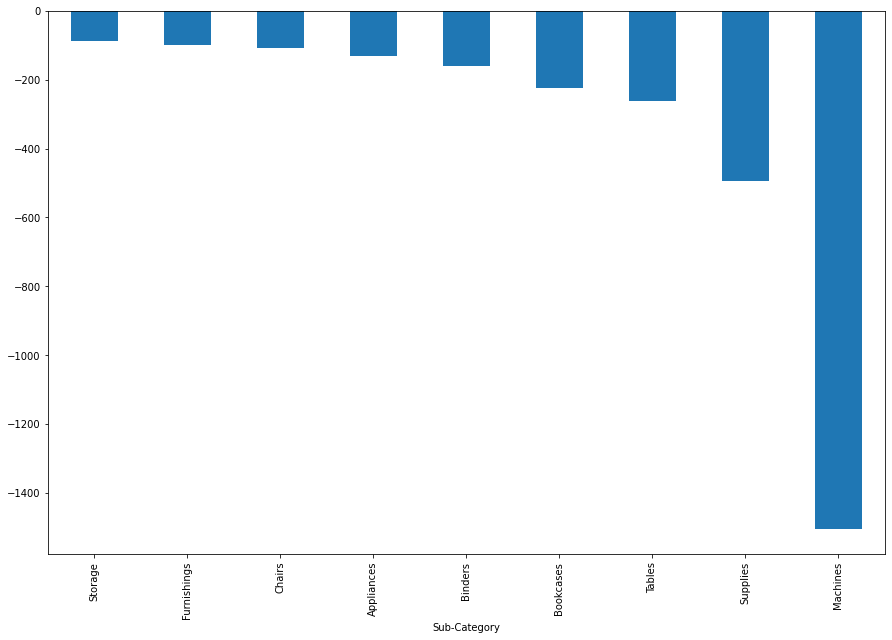

In [102]:
d.groupby("Sub-Category").mean()['Profit'].sort_values(ascending = False).plot.bar(figsize = (15,10))

####**By Cities**

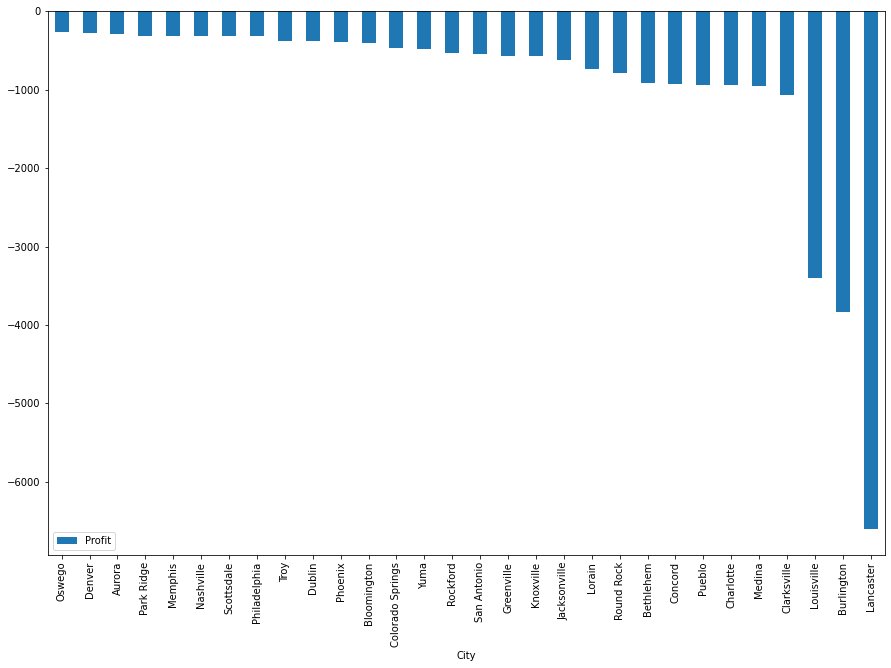

In [124]:
d.tail(30).plot.bar(figsize = (15,10))

###**Average Profit and Sale of Binders Group by City**

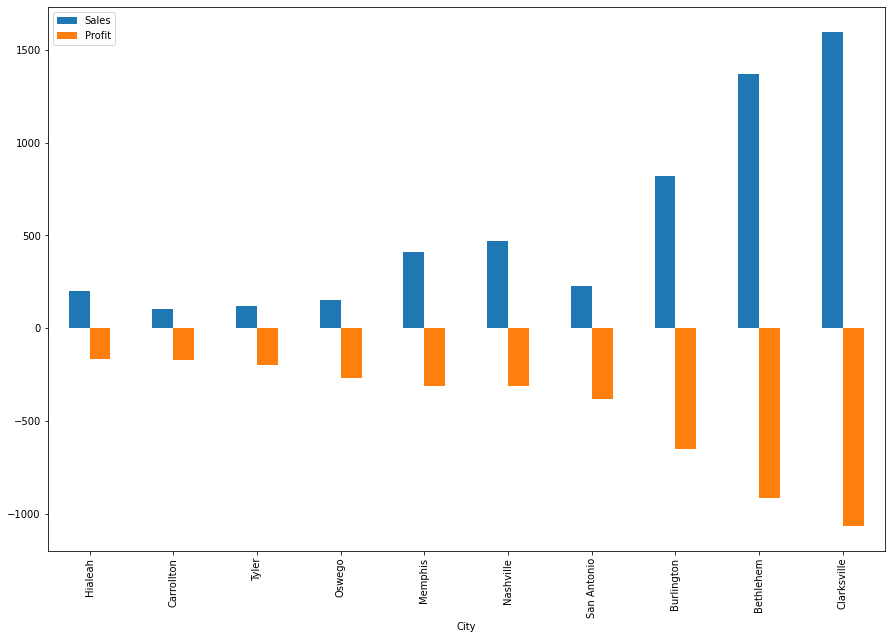

In [ ]:
df[df['Sub-Category']=='Binders'].groupby('City').mean()[['Sales','Profit']].sort_values(by='Profit',ascending = False).tail(10).plot.bar(figsize = (15,10))

###**Average Profit and Sale of Machines Group by City**

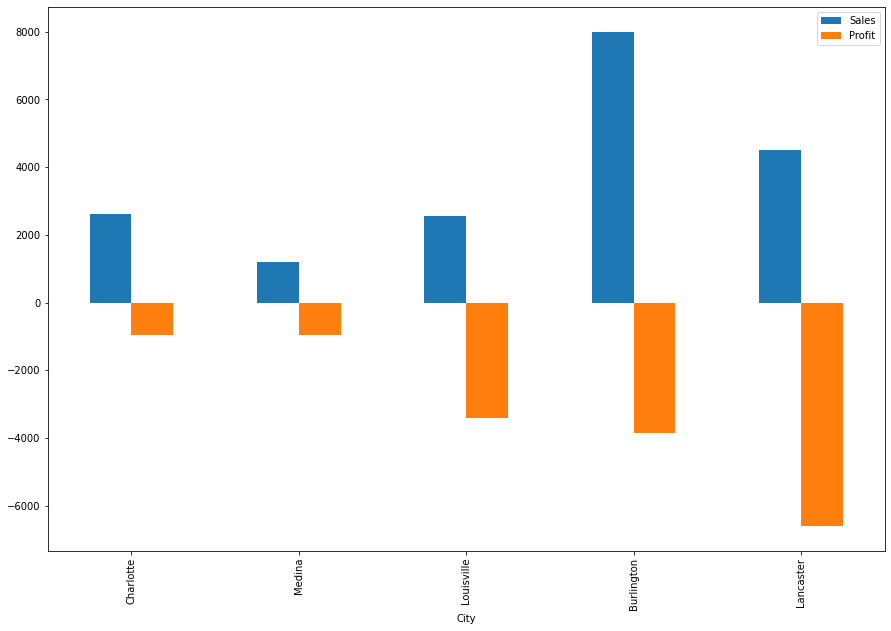

In [ ]:
df[df['Sub-Category']=='Machines'].groupby('City').mean()[['Sales','Profit']].sort_values(by='Profit',ascending = False).tail().plot.bar(figsize = (15,10))

##**Average Profit and Average Sales By Category**

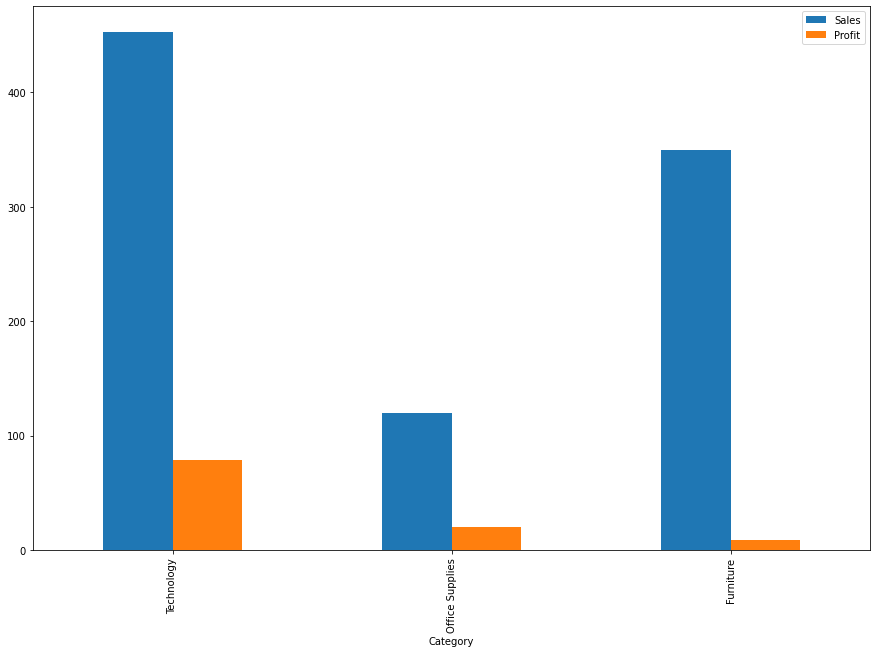

In [ ]:
df.groupby('Category').mean()[['Sales','Profit']].sort_values(by='Profit',ascending = False).plot.bar(figsize = (15,10))

##**Table of Category and Subcategory**

In [ ]:
str(df[df['Category']=='Furniture']['Sub-Category'].unique())

"['Bookcases' 'Chairs' 'Tables' 'Furnishings']"

In [ ]:
data={ 'Category':df['Category'].unique(),'Sub':[]}

In [ ]:

for category in df['Category'].unique():
  data['Sub'].append(str(df[df['Category']==category]['Sub-Category'].unique()))

pd.DataFrame(data,index=[0,1,2],)


,Category,Sub
0,Furniture,['Bookcases' 'Chairs' 'Tables' 'Furnishings']
1,Office Supplies,['Labels' 'Storage' 'Art' 'Binders' 'Appliance...
2,Technology,['Phones' 'Accessories' 'Machines' 'Copiers']


##**Average Profit and Average Sales By Subcategory**

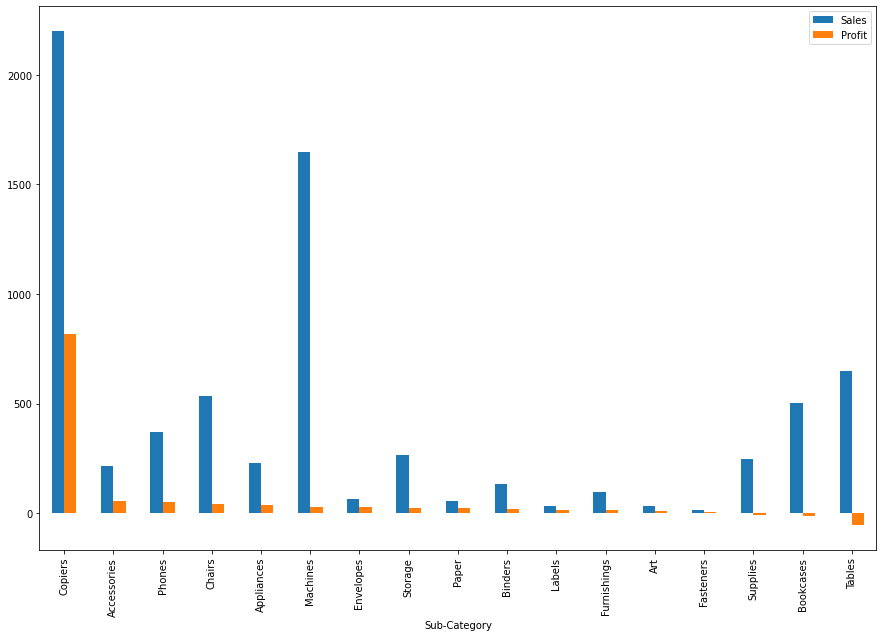

In [ ]:
df.groupby('Sub-Category').mean()[['Sales','Profit']].sort_values(by='Profit',ascending = False).plot.bar(figsize = (15,10))

#**Conclusion**

 Discount, State , City are the affecting areas in loss

    1) 45% ,80% ,50% ,70% ,60% ,32% discount are giving loss.To overcome this we can set 10% ,0% ,15% ,20% discount for achieving profit
    2) Tables and Machines are one which are affecting Maximum loss in 10 states
    3) Machines and supplies are most which are affecting Maximuma loss along with Table, Bookcases, Blinders, Appliances, Chair, Furnishing, 
    Storage in 116 cites